In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools
import glob 

In [2]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_ammonia_20180101_20191231.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
data = data.assign_coords(time = time_values)
data

<xarray.Dataset>
Dimensions:   (time: 24, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) <U7 '2018-01' '2018-02' '2018-03' ... '2019-11' '2019-12'
Data variables:
    ammonium  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_ammonia_20180101_20191231
    description:  Month-averaged Ammonia extracted from SalishSeaCast v202111...
    history:      2023-11-20 13:58 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [3]:
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [4]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh_mask_depth_var='gdept_0'
thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
depth = mesh.variables[mesh_mask_depth_var][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

In [5]:
month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",

    13: "January",
    14: "February",
    15: "March",
    16: "April",
    17: "May",
    18: "June",
    19: "July",
    20: "August",
    21: "September",
    22: "October",
    23: "November",
    24: "December"
}

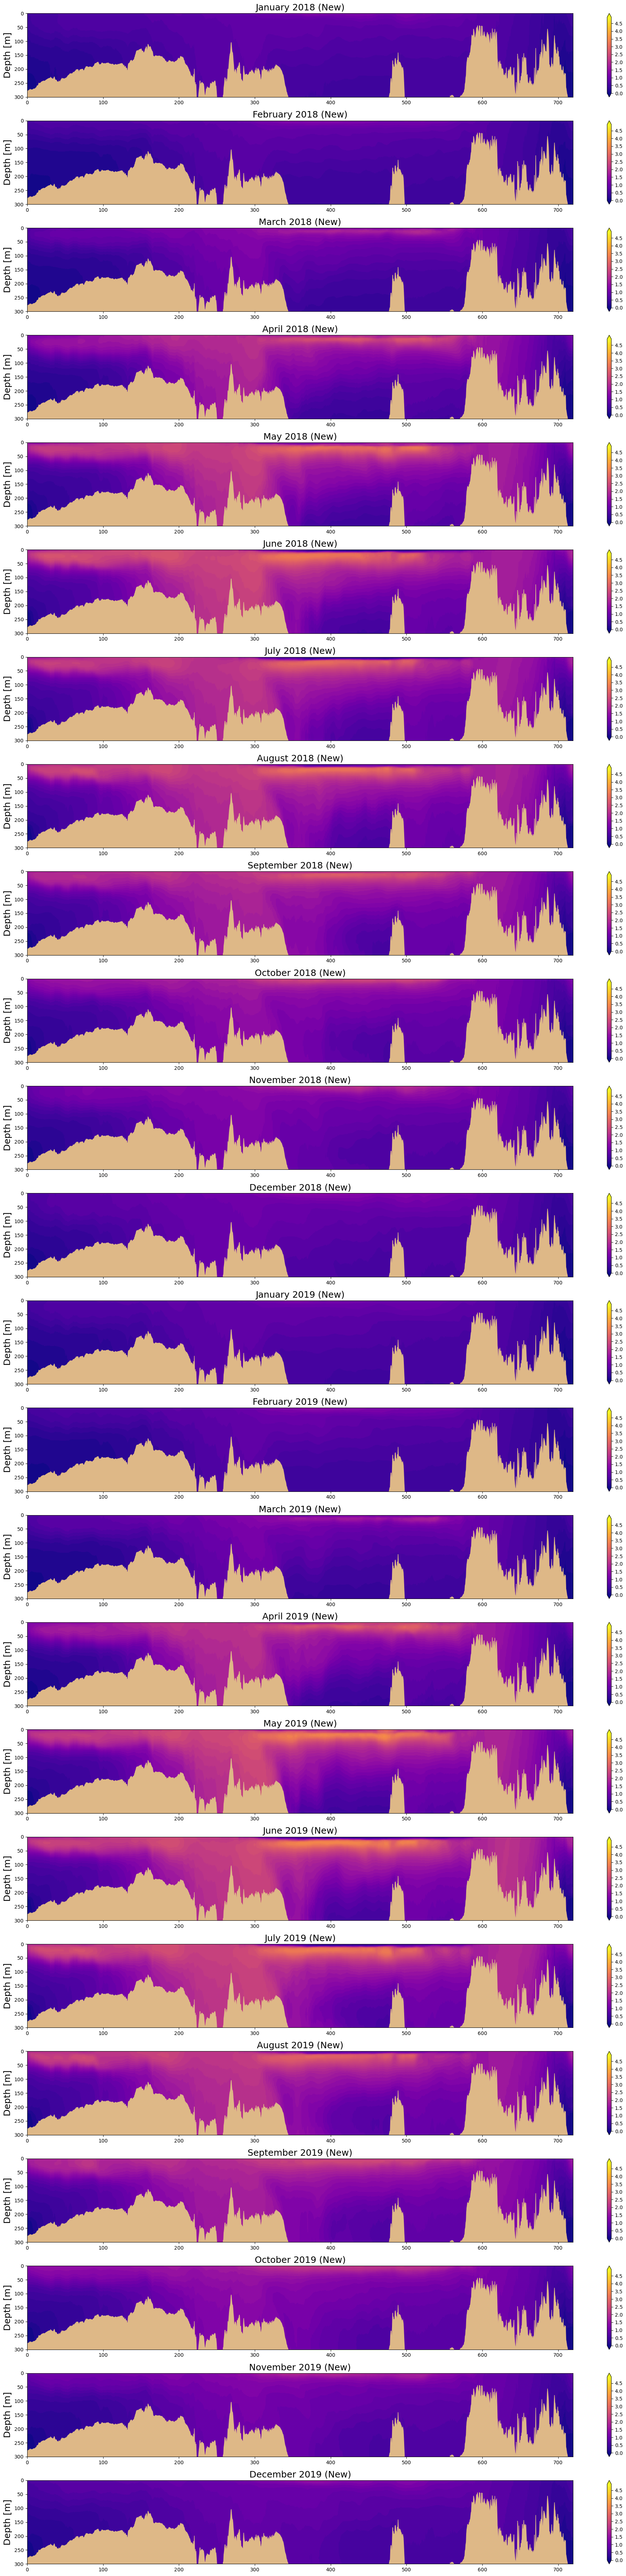

In [6]:
fig, axs = plt.subplots(24, 1, figsize=(20, 72))
jp = 0
for month in range(1, 24+1):
    dep_thal, distance, var_thal = vis.load_thalweg(
                depth[0, ...], np.array(data.ammonium[month-1]), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg_pts)
    var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg_pts)
    colours = axs[jp].contourf(distance, dep_thal, var_plot, np.arange(0, 5, 0.1), 
                                     cmap='plasma', extend='both')
    #axs[jp].contour(distance, dep_thal, var_plot, [2e-5, 1e-4], colors='green')
    vis._add_bathy_patch(
            distance, bathy['Bathymetry'][:], thalweg_pts, axs[jp], color='burlywood')
    cbar = fig.colorbar(colours, ax=axs[jp])
    axs[jp].invert_yaxis()
    axs[jp].set_ylim(300, 0)
    axs[jp].set_ylabel('Depth [m]', fontsize = 18)
    if month > 12:
        axs[jp].set_title(f'{month_names[month]} 2019 (New)', fontsize = 18)
    else:
        axs[jp].set_title(f'{month_names[month]} 2018 (New)', fontsize = 18)
    jp = jp + 1
fig.tight_layout()

In [7]:
jan18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180101_20180131.nc'
feb18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180201_20180228.nc'
mar18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180301_20180331.nc'
apr18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180401_20180430.nc'
may18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180501_20180531.nc'
jun18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180601_20180630.nc'
jul18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180701_20180731.nc'
aug18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180801_20180831.nc'
sep18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20180901_20180930.nc'
octo18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20181001_20181031.nc'
nov18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20181101_20181130.nc'
dec18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20181201_20181231.nc'

jan19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190101_20190131.nc'
feb19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190201_20190228.nc'
mar19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190301_20190331.nc'
apr19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190401_20190430.nc'
may19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190501_20190531.nc'
jun19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190601_20190630.nc'
jul19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190701_20190731.nc'
aug19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190801_20190831.nc'
sep19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20190901_20190930.nc'
octo19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20191001_20191031.nc'
nov19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20191101_20191130.nc'
dec19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_biol_T_20191201_20191231.nc'

In [8]:
jan_file_list = glob.glob(jan18)
feb_file_list = glob.glob(feb18)
mar_file_list = glob.glob(mar18)
apr_file_list = glob.glob(apr18)
may_file_list = glob.glob(may18)
jun_file_list = glob.glob(jun18)
jul_file_list = glob.glob(jul18)
aug_file_list = glob.glob(aug18)
sep_file_list = glob.glob(sep18)
octo_file_list = glob.glob(octo18)
nov_file_list = glob.glob(nov18)
dec_file_list = glob.glob(dec18)

jan_file_list19 = glob.glob(jan19)
feb_file_list19 = glob.glob(feb19)
mar_file_list19 = glob.glob(mar19)
apr_file_list19 = glob.glob(apr19)
may_file_list19 = glob.glob(may19)
jun_file_list19 = glob.glob(jun19)
jul_file_list19 = glob.glob(jul19)
aug_file_list19 = glob.glob(aug19)
sep_file_list19 = glob.glob(sep19)
octo_file_list19 = glob.glob(octo19)
nov_file_list19 = glob.glob(nov19)
dec_file_list19 = glob.glob(dec19)

In [9]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list + jan_file_list19 + feb_file_list19 + mar_file_list19 + apr_file_list19 + may_file_list19 + jun_file_list19 + jul_file_list19 + aug_file_list19 + sep_file_list19 + octo_file_list19 + nov_file_list19 +dec_file_list19
base_data = xr.open_mfdataset(all_file_list, data_vars=['ammonium'])
base_data = base_data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
base_data = base_data.assign_coords(time = time_values)
base_data

<xarray.Dataset>
Dimensions:                       (depth: 40, gridY: 898, gridX: 398, time: 24)
Coordinates:
  * depth                         (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                         (gridY) int64 0 1 2 3 4 ... 894 895 896 897
  * gridX                         (gridX) int64 0 1 2 3 4 ... 394 395 396 397
  * time                          (time) <U7 '2018-01' '2018-02' ... '2019-12'
Data variables:
    nitrate                       (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ammonium                      (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_biol_T_20180101_20180131
    description:  Month-averaged biology variables resampled from v202111 Sal...
    history:      2022-12-01 10:22 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

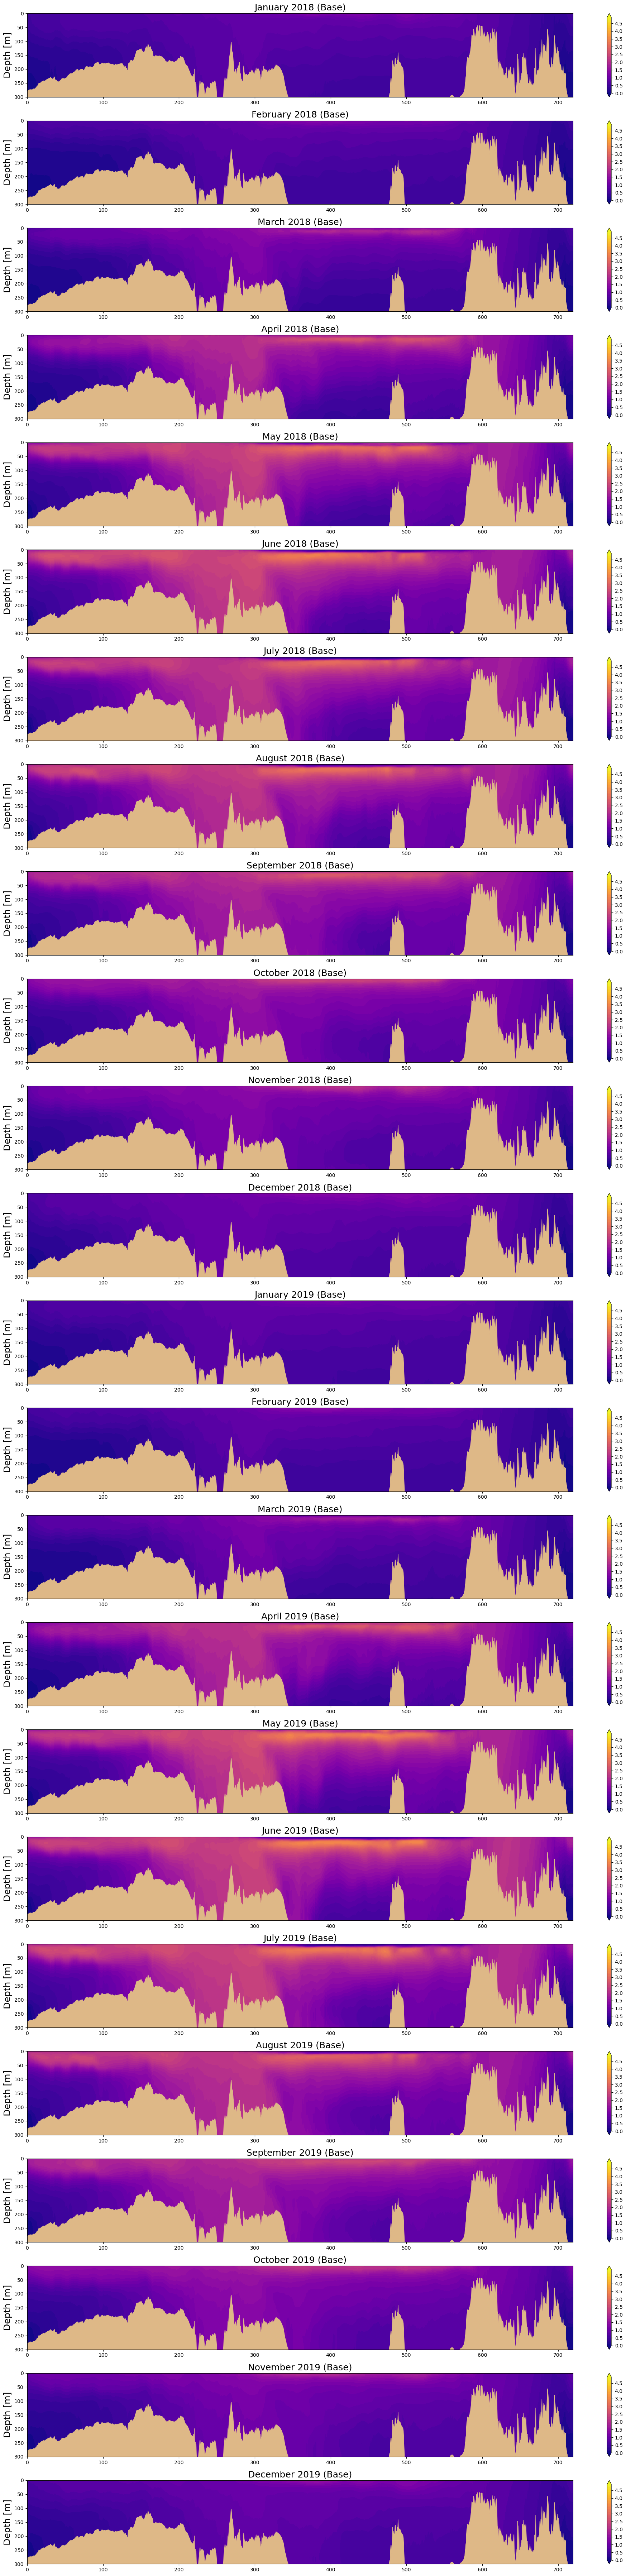

In [10]:
fig, axs = plt.subplots(24, 1, figsize=(20, 72))
jp = 0
for month in range(1, 24+1):
    dep_thal, distance, var_thal = vis.load_thalweg(
                depth[0, ...], np.array(base_data.ammonium[month-1]), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg_pts)
    var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg_pts)
    colours = axs[jp].contourf(distance, dep_thal, var_plot, np.arange(0, 5, 0.1), 
                                     cmap='plasma', extend='both')
    #axs[jp].contour(distance, dep_thal, var_plot, [2e-5, 1e-4], colors='green')
    vis._add_bathy_patch(
            distance, bathy['Bathymetry'][:], thalweg_pts, axs[jp], color='burlywood')
    cbar = fig.colorbar(colours, ax=axs[jp])
    axs[jp].invert_yaxis()
    axs[jp].set_ylim(300, 0)
    axs[jp].set_ylabel('Depth [m]', fontsize = 18)
    if month > 12:
        axs[jp].set_title(f'{month_names[month]} 2019 (Base)', fontsize = 18)
    else:
        axs[jp].set_title(f'{month_names[month]} 2018 (Base)', fontsize = 18)
    jp = jp + 1
fig.tight_layout()

In [11]:
diff = data.ammonium - base_data.ammonium

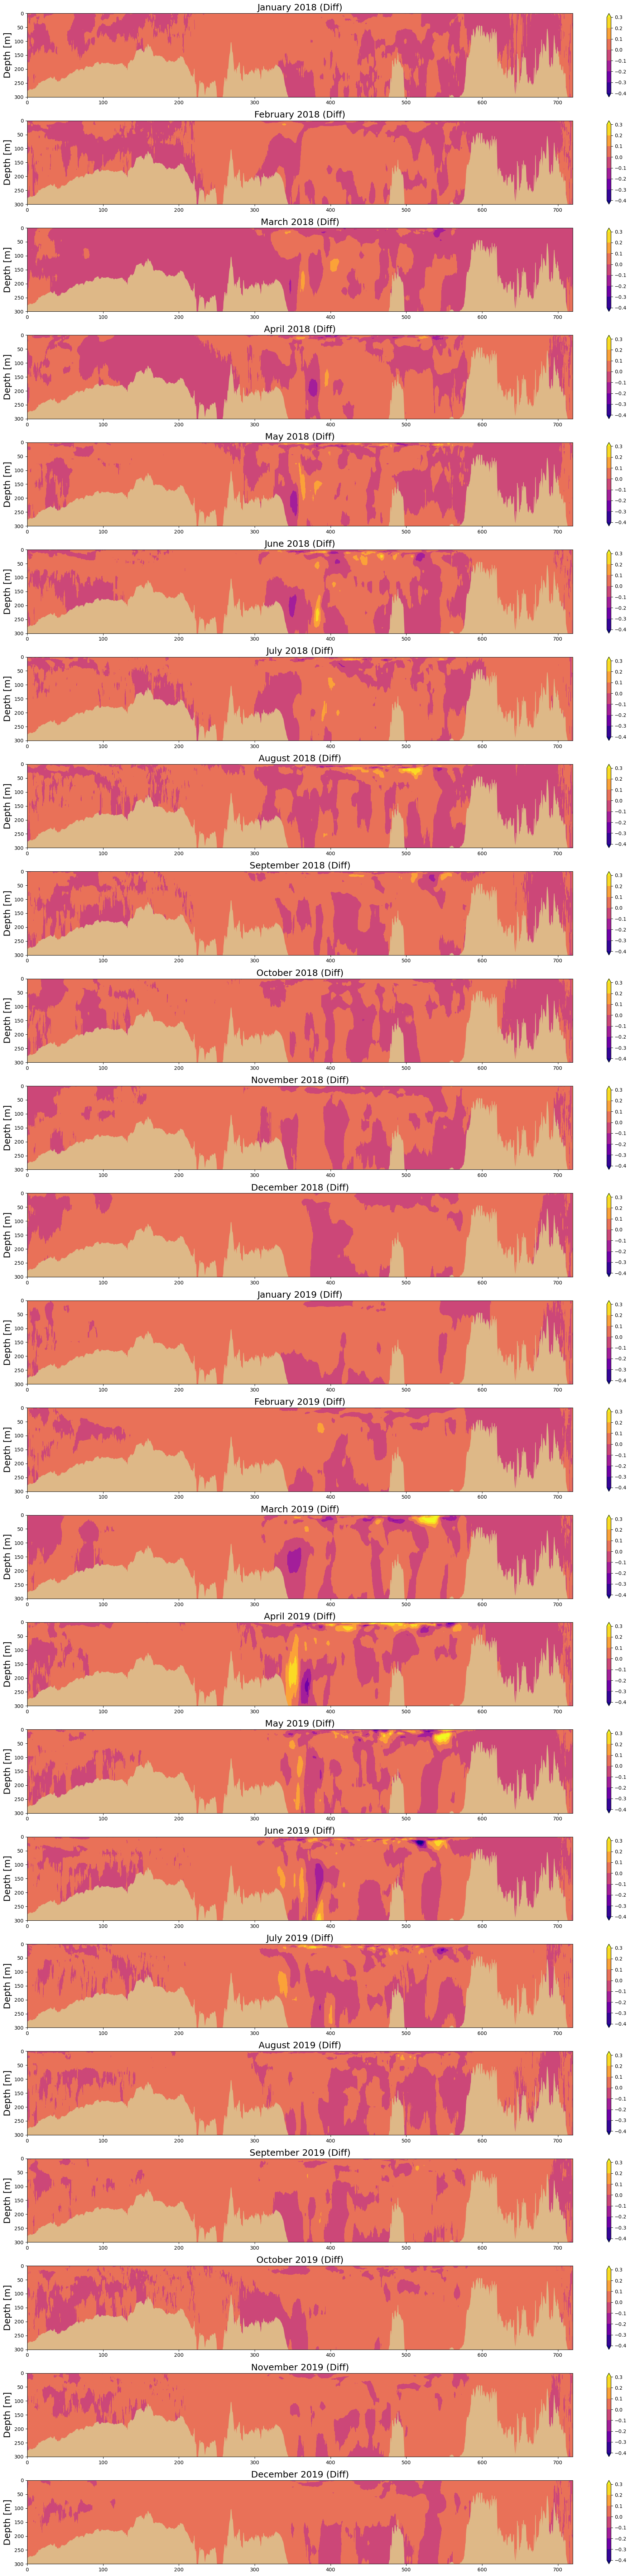

In [12]:
fig, axs = plt.subplots(24, 1, figsize=(20, 72))
jp = 0
for month in range(1, 24+1):
    dep_thal, distance, var_thal = vis.load_thalweg(
                depth[0, ...], np.array(diff[month-1]), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg_pts)
    var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg_pts)
    colours = axs[jp].contourf(distance, dep_thal, var_plot, np.arange(-0.4, 0.4, 0.1), 
                                     cmap='plasma', extend='both')
    #axs[jp].contour(distance, dep_thal, var_plot, [2e-5, 1e-4], colors='green')
    vis._add_bathy_patch(
            distance, bathy['Bathymetry'][:], thalweg_pts, axs[jp], color='burlywood')
    cbar = fig.colorbar(colours, ax=axs[jp])
    axs[jp].invert_yaxis()
    axs[jp].set_ylim(300, 0)
    axs[jp].set_ylabel('Depth [m]', fontsize = 18)
    if month > 12:
        axs[jp].set_title(f'{month_names[month]} 2019 (Diff)', fontsize = 18)
    else:
        axs[jp].set_title(f'{month_names[month]} 2018 (Diff)', fontsize = 18)
    jp = jp + 1
fig.tight_layout()